# Scaled Sound Pressure Level Prediction and Linear Regression & Random Forest Regression in Python

 Attribute Information:

This problem has the following inputs:
    
1. Frequency, in Hertzs.
2. c of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.



This machine learning project is about predicting the sound pressure leel. The data set ‘airfoil_self_noise.data’ can be downloaded 'https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise'.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
data= pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None,names=['Frequency','Angle','Chord_length','velocity','thickness','sound_pressure'])

# Data Representation 

In [4]:
data

,Frequency,Angle,Chord_length,velocity,thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [5]:
data.dtypes

Frequency           int64
Angle             float64
Chord_length      float64
velocity          float64
thickness         float64
sound_pressure    float64
dtype: object

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Frequency,Angle,Chord_length,velocity,thickness,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# Data allocation for X and y values

In [20]:
X=data.iloc[:,0:-1].values

In [19]:
y=data.iloc[:,-1].values

In [21]:
type(X)

numpy.ndarray

In [22]:
type(y)

numpy.ndarray

In [26]:
X.shape

(1503, 5)

In [29]:
y.shape

(1503,)

In [67]:
data.describe()

,Frequency,Angle,Chord_length,velocity,thickness,sound_pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [71]:
data.corr()

,Frequency,Angle,Chord_length,velocity,thickness,sound_pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
sound_pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


# Data Visualization

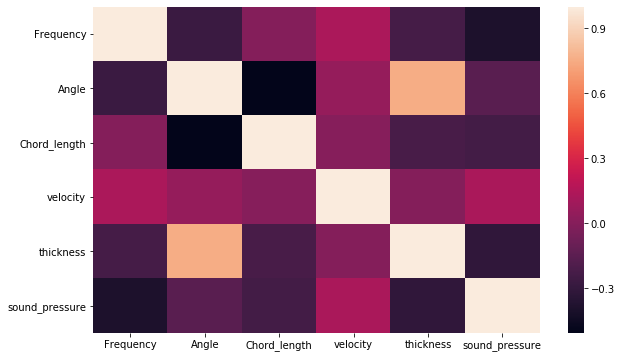

In [76]:
plt.figure(figsize = (10,6)) 
sns.heatmap(data.corr())

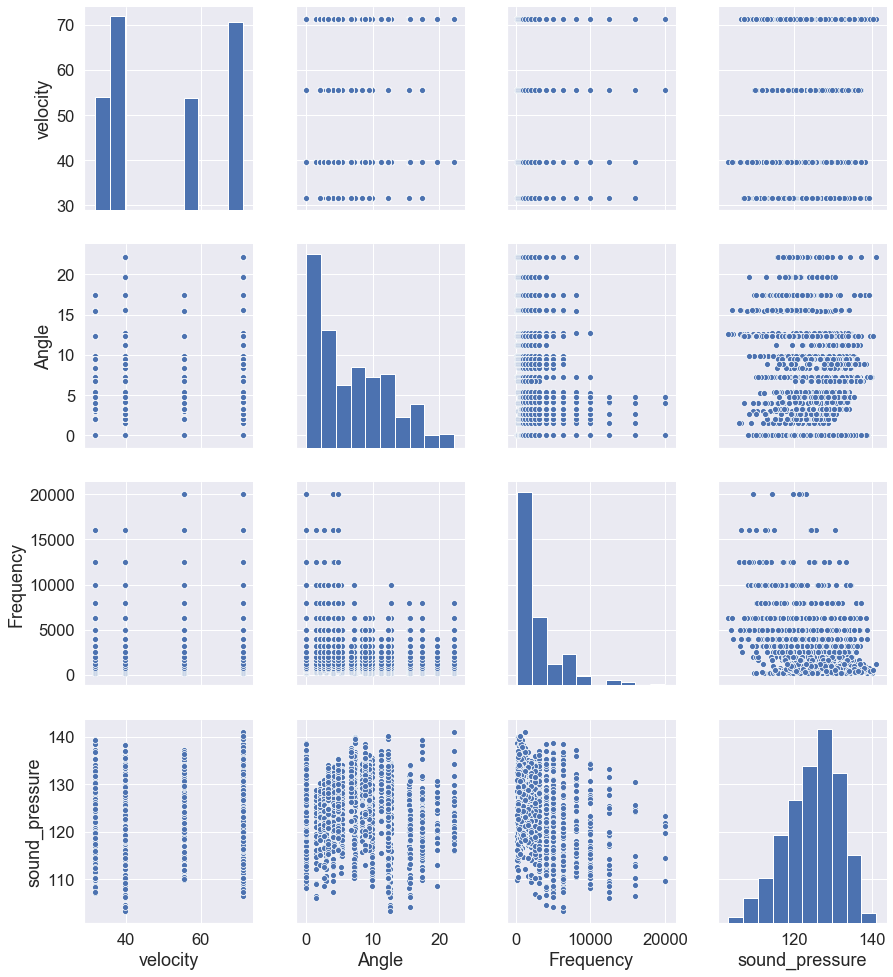

In [79]:
sns.set(font_scale = 1.5)
sns.pairplot(data[['velocity','Angle','Frequency','sound_pressure']],height = 3.5,aspect = 0.9)

The light shaded areas are highly correlated. It can be observed that ‘velocity’ has relatively high correlation with ‘Frequency’, ‘sound_pressure’ 'Chord_length' and 'Angle'.



# Training and Testing the Model 

In [30]:
from sklearn.model_selection import train_test_split

Explanation of Random_state 


random_state : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [35]:
X_train.shape

(1127, 5)

In [36]:
X_test.shape

(376, 5)

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.coef_

array([-1.28778859e-03, -4.12431176e-01, -3.52234607e+01,  9.48106374e-02,
       -1.52710931e+02])

In [41]:
lr.intercept_

133.11000515964724

In [42]:
y_pred=lr.predict(X_test)

In [112]:
linear_prediction=lr.predict(data.iloc[[50,100]].drop('velocity',1))

In [114]:
print(linear_prediction)

[-18625.5889198  -19655.04255761]


In [43]:
y_test[:20]

array([115.391, 137.658, 122.411, 133.097, 126.677, 115.857, 123.595,
       126.805, 128.907, 125.465, 135.07 , 130.311, 115.444, 110.868,
       112.699, 125.817, 136.941, 120.076, 115.812, 128.119])

In [44]:
y_pred[:20]

array([115.84928119, 131.18787733, 126.95919861, 129.08490277,
       126.02601139, 126.14297001, 127.43597747, 135.07617895,
       127.85208546, 125.80410111, 133.91103866, 130.66858012,
       125.64863874, 114.26065103, 117.52322396, 133.22756309,
       130.02468582, 129.45970481, 125.84722729, 124.02655633])

In [49]:
mean_squared_error(y_test,y_pred)

23.497580728612657

# Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf=RandomForestRegressor()

In [53]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
y_prediction=rf.predict(X_test)

In [60]:
rf?

In [61]:
rf.n_features_

5

In [62]:
rf.n_outputs_

1

In [56]:
y_test[:20]

array([115.391, 137.658, 122.411, 133.097, 126.677, 115.857, 123.595,
       126.805, 128.907, 125.465, 135.07 , 130.311, 115.444, 110.868,
       112.699, 125.817, 136.941, 120.076, 115.812, 128.119])

In [57]:
y_prediction[:20]

array([112.136 , 134.0964, 126.5769, 131.6732, 126.1202, 118.0367,
       124.0235, 126.6735, 126.7985, 125.7015, 133.2129, 131.2942,
       124.3546, 111.8588, 115.3568, 127.1904, 135.1946, 123.6961,
       118.1502, 127.1349])

In [59]:
mean_squared_error(y_test,y_prediction)

4.56536125465426

In [64]:
rf.feature_importances_

array([0.38039437, 0.05827443, 0.08259195, 0.03908384, 0.43965542])

As expected the performance of Random Forest Regressor model is better than Linear Regression model for the given data set. This is because the board game data set is very large and it is difficult for the Linear Regression model to fit the data by a straight line.

# Prediction using trained model

 The trained Random Forest Regressor model is used for prediction of ‘velocity’ of 2 randomly selected board games from data set.

In [111]:
data.iloc[[50,100]]['velocity']

50     31.7
100    71.3
Name: velocity, dtype: float64

In [86]:
prediction1 = rf.predict(data.iloc[[50,100]].drop('velocity',1))

In [87]:
print(prediction1)

[115.867 115.85 ]
